In [132]:
import numpy as np
import random
import math
from matplotlib import pyplot as plt
import time

In [124]:
def distance(p_1,p_2):
    dist = 0
    for i in range(len(p_1)):
        dist += (p_1[i] - p_2[i])**2
    return np.sqrt(dist)

In [125]:
def generate_pairs(n = 15,x_range = [0,50],y_range = [0,50]):
    A = []
    for i in range(n):
        x = random.randint(x_range[0],x_range[1])
        y = random.randint(y_range[0],y_range[1])
        pair = (x,y)
        if pair not in A:
            A.append(pair)
    return A

In [126]:
def make_scatter(A,shortest_dist = None,point1 = None,point2 = None):
    A.remove(point1)
    A.remove(point2)
    x_list = []
    y_list = []
    for point in A:
        x_list.append(point[0])
        y_list.append(point[1])
    plt.scatter(x_list,y_list)
    plt.plot([point1[0],point2[0]],[point1[1],point2[1]],'ro-')
    plt.show

In [127]:
def brute_force_closest_points(A):
    first_point = None
    second_point = None
    shortest_dist = math.inf
    for point1 in A:
        for point2 in A:
            if point1 == point2:
                continue
            else:
                dist = distance(point1,point2)
                if dist < shortest_dist: 
                    shortest_dist = dist
                    first_point = point1
                    second_point = point2

    return shortest_dist, first_point, second_point

(23, 24) (23, 21) 3.0


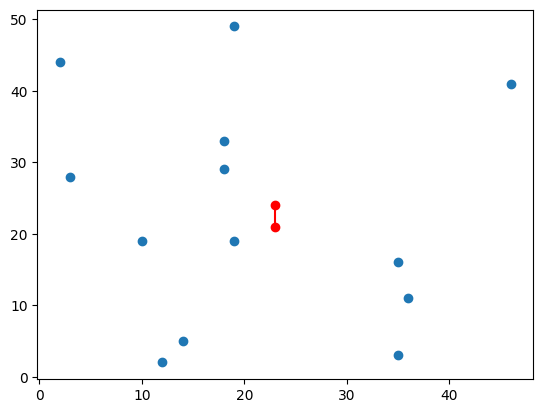

In [128]:
A = generate_pairs() #confirm that brute force works
shortest,p_1,p_2 = brute_force_closest_points(A)
print(p_1,p_2,shortest)
make_scatter(A,shortest_dist=shortest,point1=p_1,point2=p_2)

In [129]:
#sort tuples (a,b) based on either a or b depending on argument
def merge(left,right,dim):
    merge_list = []
    left_index, right_index = 0, 0
    xy = 0 if dim == 'x' else 1
    while(left_index < len(left) and right_index < len(right)):
        if left[left_index][xy] > right[right_index][xy]:
            merge_list.append(right[right_index])
            right_index+=1
        else:
            merge_list.append(left[left_index])
            left_index+=1
    if left_index == len(left):
        merge_list += right[right_index:]
    elif right_index == len(right):
        merge_list += left[left_index:]
    return merge_list

def mergesort(A,dim):
    if len(A) == 1:
        return A
    mid = len(A)//2
    left = mergesort(A[0:mid],dim)
    right = mergesort(A[mid:],dim)
    return merge(left,right,dim)

In [130]:
def closest_points(A):
    x_sort = mergesort(A,dim = 'x')
    y_sort = mergesort(A,dim = 'y')
    point1 = None
    point2 = None
    shortest_dist = 0

    if len(A) == 2: #if only two points just return distance between them
        point1 = A[0]
        point2 = A[1]
        shortest_dist = distance(point1,point2)
    elif len(A) < 2: #if we get to one point return distance as infinity so it is garunteed to not be selected
        point1 = A[0]
        point2 = A[0]
        shortest_dist = math.inf
    else:
        mid = len(A)//2
        l_point1,l_point2,left = closest_points(x_sort[:mid])
        r_point1,r_point2,right = closest_points(x_sort[mid:])
        left_or_right = np.argmin([left,right])

        if left_or_right:
            point1,point2,shortest_dist = r_point1,r_point2,right
        else:
            point1,point2,shortest_dist = l_point1,l_point2,left

        x_mid = x_sort[mid][0] #find boundaries and middle of S
        x_min = x_mid - shortest_dist
        x_max = x_mid + shortest_dist

        left_strip = [] #find L intersect S
        for point in y_sort[:mid]:
            if point[0] < x_mid and point[0] >= x_min: left_strip.append(point)
        
        right_strip = [] #Y intersect R interstect S
        for point in y_sort:
            if point[0] >= x_mid and point[0] <= x_max: right_strip.append(point)
        
        right_pos = 0 #Im shocked this worked
        for p1 in left_strip:
            for i in range(5):
                if (i+right_pos) > len(right_strip)-1: break
                p2 = right_strip[right_pos+i]
                if p2[1] < (p1[1] - shortest_dist):
                    right_pos +=1
                    i -= 1
                elif p2[1] >= (p1[1] + shortest_dist): break
                else:
                    dist = distance(p1,p2)
                    if dist < shortest_dist:
                        shortest_dist = dist
                        point1 = p1
                        point2 = p2
        
    return point1,point2,shortest_dist

(16, 16) (16, 17) 1.0


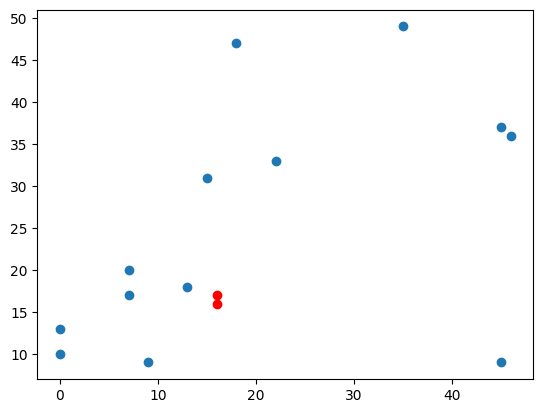

In [131]:
A = generate_pairs() #confirm divide and conquer works
p_1,p_2,shortest = closest_points(A)
print(p_1,p_2,shortest)
make_scatter(A,shortest_dist=shortest,point1=p_1,point2=p_2)

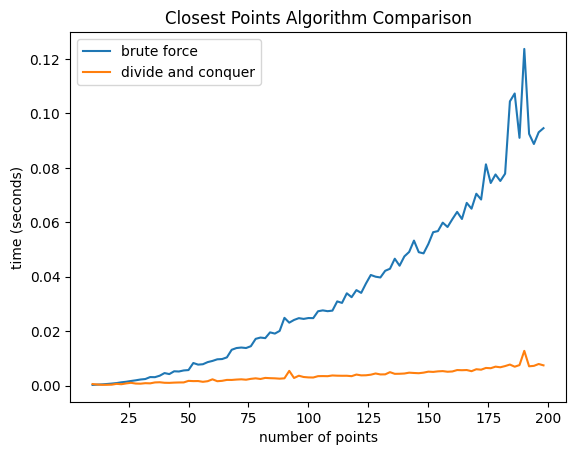

In [135]:
def compare_times():
    x_list = range(10, 200, 2)
    brute_force_times = []
    divide_conquer_times = []
    for i in x_list:
        A = generate_pairs(n = i)

        start = time.perf_counter()
        brute_force_closest_points(A)
        end = time.perf_counter()
        brute_force_times.append(end-start)

        start = time.perf_counter()
        closest_points(A)
        end = time.perf_counter()
        divide_conquer_times.append(end-start)
    
    fig, ax = plt.subplots()
    ax.set_xlabel("number of points")
    ax.set_ylabel("time (seconds)")
    ax.set_title("Closest Points Algorithm Comparison")
    ax.plot(x_list,brute_force_times,label = 'brute force')
    ax.plot(x_list,divide_conquer_times,label = 'divide and conquer')
    ax.legend()
    plt.show()

compare_times()
        

As expected the divide and conquer algorithm performs much better than the brute force one. To generalize this to 3d we would simply find the shortest distance in each subsection the way that we normally do using recursion. Then, after each step of the recursion we would consider the points within a cube with a side length equal to the shortest distance returned by either half. There will be a finite number of points in this cube, so it limits the amount of comparisons that we have to make.